In [ ]:
#Question

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve,accuracy_score

data = pd.read_csv("horseRacing.csv")
# Handling missing values
data.dropna(inplace=True)
# Removing duplicates
data.drop_duplicates(inplace=True)

data['price'] = data['price'].apply(lambda x: int(x > 0))

In [ ]:
# Implement one-hot encoding on the Race ID Column
race_one_hot = pd.get_dummies(data['race_id'], prefix='race')
data = pd.concat([data, race_one_hot], axis=1)
data.drop('race_id', axis=1, inplace=True)

In [ ]:
# Horse Id
horse_one_hot = pd.get_dummies(data['horse_id'], prefix='horse')
data = pd.concat([data, horse_one_hot], axis=1)
data.drop('horse_id', axis=1, inplace=True)

In [ ]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
# Evaluation
predictions = mlp.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 1.0

Confusion Matrix:
[[2504]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2504

    accuracy                           1.00      2504
   macro avg       1.00      1.00      1.00      2504
weighted avg       1.00      1.00      1.00      2504



In [ ]:
# ROC Curve
y_score = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1020: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


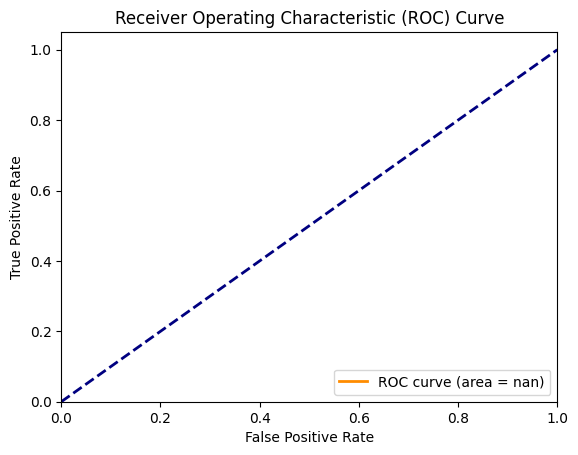

In [ ]:
#ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()